In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import seaborn as sns
from wordcloud import WordCloud
%matplotlib inline
import re
import json
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.sequence import pad_sequences
# from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.text import Tokenizer

In [2]:
DATA_IN_PATH = './nsmc-master/'
print('파일 크기 : ')
for file in os.listdir(DATA_IN_PATH):
    if 'txt' in file:
        print(file.ljust(30) + str(round(os.path.getsize(DATA_IN_PATH + file)/1000000,2)) + 'MB')

파일 크기 : 
ratings.txt                   19.52MB
ratings_test.txt              4.89MB
ratings_train.txt             14.63MB


In [3]:
train_data = pd.read_csv(DATA_IN_PATH + 'ratings_train.txt', header = 0, delimiter='\t',quoting = 3)
train_data.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [4]:
print('전체 학습 데이터의 개수 : {}'.format(len(train_data)))

전체 학습 데이터의 개수 : 150000


In [5]:
train_length = train_data['document'].astype(str).apply(len)
train_length.head()

0    19
1    33
2    17
3    29
4    61
Name: document, dtype: int64

Text(0, 0.5, 'Number of review')

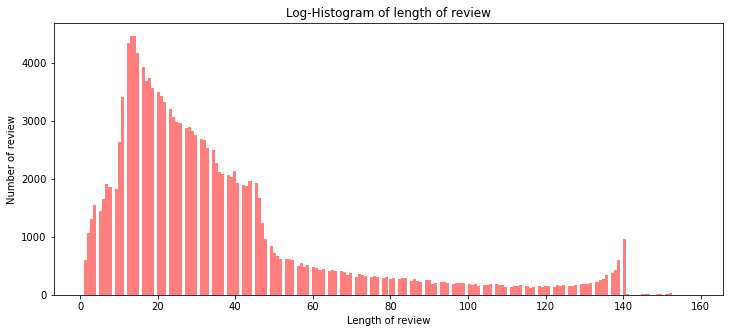

In [7]:
# 그래프에 대한 이미지 크기 선언
# figsize = (가로, 세로)형태의 튜플로 입력
plt.figure(figsize=(12,5))
# 히스토그램 선언
# bins : 히스토그램 값에 대한 버킷 범위
# range : x축 값의 범위
# alpha : 그래프 색상 투명도
# color : 그래프 색상
# label : 그래프에 대한 라벨
plt.hist(train_length, bins = 200, alpha = 0.5, color = 'r', label = 'word')
# plt.yscale('log', nonposy='clip')
# 그래프 제목
plt.title('Log-Histogram of length of review')
# 그래프 x축 라벨
plt.xlabel('Length of review')
# 그래프 y축 라벨
plt.ylabel('Number of review')

In [8]:
print('리뷰 길이 최대 값: {}'.format(np.max(train_length)))
print('리뷰 길이 최소 값: {}'.format(np.min(train_length)))
print('리뷰 길이 평균 값: {:.2f}'.format(np.mean(train_length)))
print('리뷰 길이 표준편차: {:.2f}'.format(np.std(train_length)))
print('리뷰 길이 중간 값: {}'.format(np.median(train_length)))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('리뷰 길이 제 1 사분위: {}'.format(np.percentile(train_length, 25)))
print('리뷰 길이 제 3 사분위: {}'.format(np.percentile(train_length, 75)))

리뷰 길이 최대 값: 158
리뷰 길이 최소 값: 1
리뷰 길이 평균 값: 35.24
리뷰 길이 표준편차: 29.58
리뷰 길이 중간 값: 27.0
리뷰 길이 제 1 사분위: 16.0
리뷰 길이 제 3 사분위: 42.0


{'whiskers': [<matplotlib.lines.Line2D at 0x18df540c3d0>,
 'caps': [<matplotlib.lines.Line2D at 0x18df540ca30>,
 'boxes': [<matplotlib.lines.Line2D at 0x18df540c0d0>],
 'medians': [<matplotlib.lines.Line2D at 0x18df540cf10>],
 'fliers': [<matplotlib.lines.Line2D at 0x18df54184f0>],
 'means': [<matplotlib.lines.Line2D at 0x18df5418220>]}

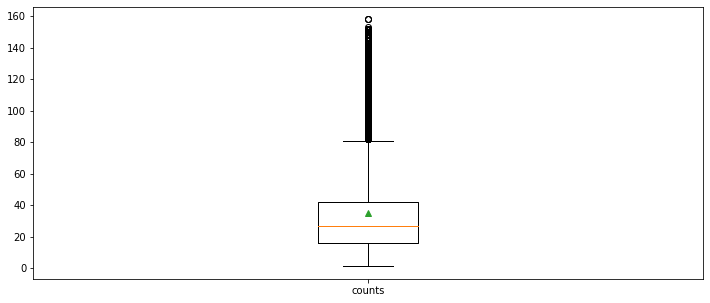

In [9]:
plt.figure(figsize=(12, 5))
# 박스플롯 생성
# 첫번째 파라메터: 여러 분포에 대한 데이터 리스트를 입력
# labels: 입력한 데이터에 대한 라벨
# showmeans: 평균값을 마크함

plt.boxplot(train_length,
             labels=['counts'],
             showmeans=True)

In [10]:
train_review = [review for review in train_data['document'] if type(review) is str]

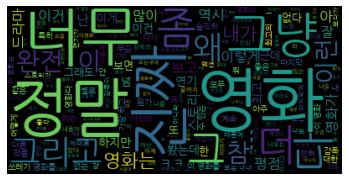

In [11]:
wordcloud = WordCloud(font_path = DATA_IN_PATH + 'NanumGothic.ttf').generate(''.join(train_review))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

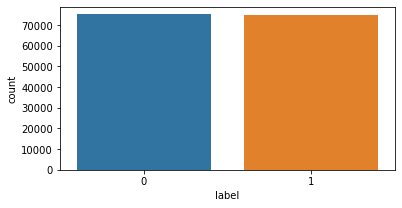

In [12]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6,3)
sns.countplot(train_data['label'])

In [13]:
print('긍정 리뷰 개수: {}'.format(train_data['label'].value_counts()[1]))
print('부정 리뷰 개수: {}'.format(train_data['label'].value_counts()[0]))

긍정 리뷰 개수: 74827
부정 리뷰 개수: 75173


In [14]:
train_word_counts = train_data['document'].astype(str).apply(lambda x:len(x.split(' ')))

Text(0, 0.5, 'Number of words')

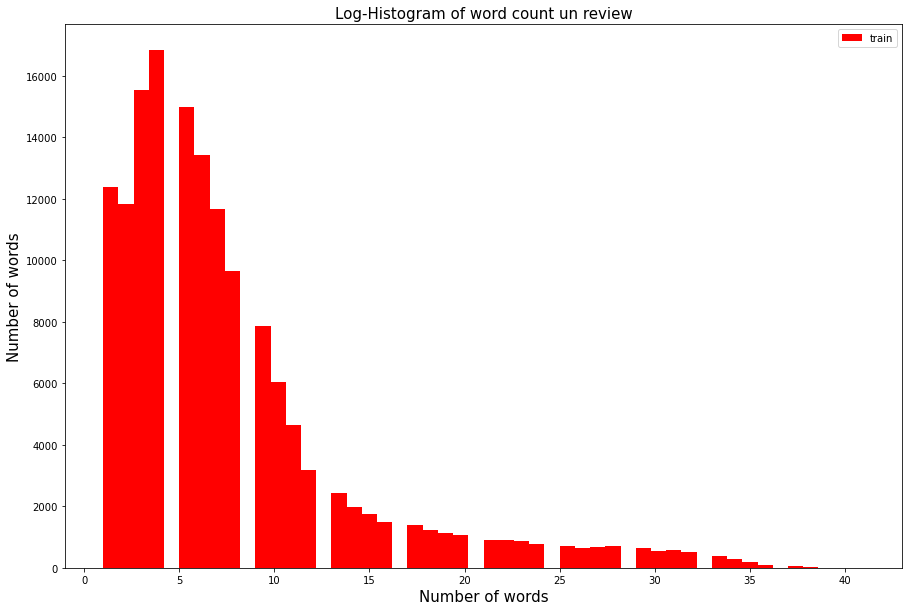

In [16]:
plt.figure(figsize = (15, 10))
plt.hist(train_word_counts, bins = 50, facecolor = 'r', label = 'train')
plt.title('Log-Histogram of word count un review', fontsize = 15)
# plt.ysclae('log', nonposy = 'clip')
plt.legend()
plt.xlabel('Number of words', fontsize = 15)
plt.ylabel('Number of words', fontsize = 15)

In [17]:
print('리뷰 단어 개수 최댓값: {}'.format(np.max(train_word_counts)))
print('리뷰 단어 개수 최솟값: {}'.format(np.min(train_word_counts)))
print('리뷰 단어 개수 평균값: {: .2f}'.format(np.min(train_word_counts)))
print('리뷰 단어 개수 표준편차: {: .2f}'.format(np.std(train_word_counts)))
print('리뷰 단어 개수 중간값: {}'.format(np.median(train_word_counts)))
# 사분위의 대한 경우는 0~100 스케일로 돼 있음
print('리뷰 단어 개수 제1사분위: {}'.format(np.percentile(train_word_counts, 25)))
print('리뷰 단어 개수 제3사분위: {}'.format(np.percentile(train_word_counts, 75)))

리뷰 단어 개수 최댓값: 41
리뷰 단어 개수 최솟값: 1
리뷰 단어 개수 평균값:  1.00
리뷰 단어 개수 표준편차:  6.51
리뷰 단어 개수 중간값: 6.0
리뷰 단어 개수 제1사분위: 3.0
리뷰 단어 개수 제3사분위: 9.0


In [18]:
#물음표가 구두점으로 쓰임
qmarks = np.mean(train_data['document'].astype(str).apply(lambda x: '?' in x))

# 마침표
fullstop = np.mean(train_data['document'].astype(str).apply(lambda x: '.' in x))

print('물음표가 있는 질문 : {: .2f}%'.format(qmarks * 100))
print('마침표가 있는 질문 : {: .2f}%'.format(fullstop * 100))

물음표가 있는 질문 :  8.25%
마침표가 있는 질문 :  51.76%


In [19]:

DATA_IN_PATH = './nsmc-master/'

train_data = pd.read_csv(DATA_IN_PATH + 'ratings_train.txt', header = 0, delimiter = '\t', quoting = 3)

In [20]:
review_text = re.sub("[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]", "",train_data['document'][0])
print(review_text)

아 더빙 진짜 짜증나네요 목소리


In [21]:
import konlpy
from konlpy.tag import Okt

In [22]:
okt = Okt()
review_text = okt.morphs(review_text, stem = True)
print(review_text)

['아', '더빙', '진짜', '짜증나다', '목소리']


In [23]:
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize

In [24]:
stop_words = set(['은', '는', '이', '가', '하', '아', '것', '들', '의', '있', '되', '수', '보', '주', '등', '한'])
clean_review = [token for token in review_text if not token in stop_words]
clean_review

['더빙', '진짜', '짜증나다', '목소리']

In [25]:
def preprocessing(review, okt, remove_stopwords = False, stop_words = []):
    #함수의 인자는 다음과 같다
    # review : 전처리할 텍스트
    # okt : okt 객체를 반복적으로 생서하지 않고 미리 생성한 후 인자로 받는다
    # remove_stopword : 불용어를 제가할지 여부 선택, 기본값은 False
    # stop_sord : 불용어 사전은 사용자가 직접 입력해야 함. 기본값은 빈 리스트
    
    # 1. 한글 및 공백을 제외한 문자를 모두 제거
    review_text = re.sub("[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]", "", review)
    
    # 2. okt 객체를 활용해 형태소 단위로 나눈다
    word_review = okt.morphs(review_text, stem = True)
    
    if remove_stopwords:
        # 불용어 제거 (선택적)
        word_review = [token for token in word_review if not token in stop_words]
    return word_review

In [26]:
print(train_data)

              id                                           document  label
0        9976970                                아 더빙.. 진짜 짜증나네요 목소리      0
1        3819312                  흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나      1
2       10265843                                  너무재밓었다그래서보는것을추천한다      0
3        9045019                      교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정      0
4        6483659  사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...      1
...          ...                                                ...    ...
149995   6222902                                인간이 문제지.. 소는 뭔죄인가..      0
149996   8549745                                      평점이 너무 낮아서...      1
149997   9311800                    이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?      0
149998   2376369                        청춘 영화의 최고봉.방황과 우울했던 날들의 자화상      1
149999   9619869                           한국 영화 최초로 수간하는 내용이 담긴 영화      0

[150000 rows x 3 columns]


In [27]:
stop_words = ['은', '는', '이', '가', '하', '아', '것', '들', '의', '있', '되', '수', '보', '주', '등', '한']
okt = Okt()
clean_train_review = []

for review in train_data['document']:
    #비어있는 데이터에서 멈추지 않도록 문자열인 경우에만 진행
    if type(review) == str:
        clean_train_review.append(preprocessing(review, okt, remove_stopwords=True, stop_words=stop_words))
    
    # string이 아니면 비어있는 값 추가
    else:
        clean_train_review.append([])

# 앞의 4개의 데이터 확인        
clean_train_review[ : 4] 

[['더빙', '진짜', '짜증나다', '목소리'],
 ['흠', '포스터', '보고', '초딩', '영화', '줄', '오버', '연기', '조차', '가볍다', '않다'],
 ['너', '무재', '밓었', '다그', '래서', '보다', '추천', '다'],
 ['교도소', '이야기', '구먼', '솔직하다', '재미', '없다', '평점', '조정']]

In [ ]:
len(clean_train_review)

In [29]:
test_data = pd.read_csv(DATA_IN_PATH + 'ratings_test.txt', header = 0, delimiter = '\t', quoting = 3)

clean_test_review = []

for review in test_data['document']:
    #비어있는 데이터에서 멈추지 않도록 문자열인 경우에만 진행
    if type(review) == str:
        clean_test_review.append(preprocessing(review, okt, remove_stopwords=True, stop_words=stop_words))
    
    # string이 아니면 비어있는 값 추가
    else:
        clean_test_review.append([])
        

In [30]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_train_review)
train_sequences = tokenizer.texts_to_sequences(clean_train_review)
test_sequences = tokenizer.texts_to_sequences(clean_test_review)

word_vocab = tokenizer.word_index # 단어 사전 형태

MAX_SEQUENCE_LENGTH = 8 # 문장 최대 길이

train_inputs = pad_sequences(train_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding = 'post')
# 학습 데이터 벡터화
train_labels =np.array(train_data['label']) # 학습 데이터의 라벨

test_inputs = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding = 'post')
# 학습 데이터 벡터화
test_labels = np.array(test_data['label']) # 학습 데이터의 라벨

In [32]:
# print(train_inputs.shape)
train_labels.shape
np.array(train_data['label']).shape
train_labels =np.array(train_data['label'])
train_labels.shape

(150000,)

In [34]:
DATA_IN_PATH = './data_in/' ##################################경로
TRAIN_INPUT_DATA = 'nsmc_train_input.npy'
TRAIN_LABEL_DATA = 'nsmc_train_label.npy'
TEST_INPUT_DATA = 'nsmc_test_input.npy'
TEST_LABEL_DATA = 'nsmc_test_label.npy'
DATA_CONFIGS = 'data_configs.json'

data_configs = {}

data_configs['vocab'] = word_vocab
data_configs['vocab_size'] = len(word_vocab) # vocab size 추가

import os
# 저장하는 디렉토리가 존재하지 않으면 생성
if not os.path.exists(DATA_IN_PATH):
    os.makedirs(DATA_IN_PATH)

# 전처리 된 학습 데이터를 넘파이 형태로 저장
np.save(open(DATA_IN_PATH + TRAIN_INPUT_DATA, 'wb'), train_inputs)
np.save(open(DATA_IN_PATH + TRAIN_LABEL_DATA, 'wb'), train_labels)
# 전처리 된 테스트 데이터를 넘파이 형태로 저장
np.save(open(DATA_IN_PATH + TEST_INPUT_DATA, 'wb'), test_inputs)
np.save(open(DATA_IN_PATH + TEST_LABEL_DATA, 'wb'), test_labels)

# 데이터 사전을 json 형태로 저장
json.dump(data_configs, open(DATA_IN_PATH + DATA_CONFIGS, 'w'), ensure_ascii=False)

In [35]:
train_labels.shape

(150000,)

In [36]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import layers

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import os
import json

from tqdm import tqdm

In [37]:
DATA_IN_PATH = './data_in/' ##################################경로
DATA_OUT_PATH = './data_out/' ##################################경로
INPUT_TRAIN_DATA = 'nsmc_train_input.npy'
LABEL_TRAIN_DATA = 'nsmc_train_label.npy'
DATA_CONFIGS = 'data_configs.json'

train_input = np.load(open(DATA_IN_PATH + INPUT_TRAIN_DATA, 'rb'))
train_input = pad_sequences(train_input, maxlen=train_input.shape[1])
train_label = np.load(open(DATA_IN_PATH + LABEL_TRAIN_DATA, 'rb'))
prepro_configs = json.load(open(DATA_IN_PATH + DATA_CONFIGS, 'r'))

In [38]:
train_label.shape

(150000,)

In [85]:
model_name = 'cnn_classifier_kr'
BATCH_SIZE = 512
NUM_EPOCHS = 2
VALID_SPLIT = 0.1
MAX_LEN = train_input.shape[1]

kargs = {'model_name': model_name,
        'vocab_size': prepro_configs['vocab_size']+1 ,
        'embedding_size': 128,
        'num_filters': 100,
        'dropout_rate': 0.5,
        'hidden_dimension': 250,
        'output_dimension':1}

In [86]:
class CNNClassifier(tf.keras.Model):
    
    def __init__(self, **kargs):
        super(CNNClassifier, self).__init__(name=kargs['model_name'])
        self.embedding = layers.Embedding(input_dim=kargs['vocab_size'],
                                     output_dim=kargs['embedding_size'])
        self.conv_list = [layers.Conv1D(filters=kargs['num_filters'],
                                   kernel_size=kernel_size,
                                   padding='valid',
                                   activation='relu',
                                   kernel_constraint=tf.keras.constraints.MaxNorm(max_value=3.))
                     for kernel_size in [3,4,5]]
        self.pooling = layers.GlobalMaxPooling1D()
        self.dropout = layers.Dropout(kargs['dropout_rate'])
        self.fc1 = layers.Dense(units=kargs['hidden_dimension'],
                           activation='relu',
                           kernel_constraint=tf.keras.constraints.MaxNorm(max_value=3.))
        self.fc2 = layers.Dense(units=kargs['output_dimension'],
                           activation='sigmoid',
                           kernel_constraint=tf.keras.constraints.MaxNorm(max_value=3.))
    
    def call(self, x):
        x = self.embedding(x)
        x = self.dropout(x)
        x = tf.concat([self.pooling(conv(x)) for conv in self.conv_list], axis=-1)
        x = self.fc1(x)
        x = self.fc2(x)
        
        return x

In [87]:
model = CNNClassifier(**kargs)

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')])

In [74]:
train_input.shape
# train_label.shape

(150000, 8)

In [88]:
# overfitting을 막기 위한 ealrystop 추가
earlystop_callback = EarlyStopping(monitor='val_accuracy', min_delta=0.0001,patience=2)
# min_delta: the threshold that triggers the termination (acc should at least improve 0.0001)
# patience: no improvment epochs (patience = 1, 1번 이상 상승이 없으면 종료)\

checkpoint_path = DATA_OUT_PATH + model_name + '/weights.h5'
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create path if exists
if os.path.exists(checkpoint_dir):
    print("{} -- Folder already exists \n".format(checkpoint_dir))
else:
    os.makedirs(checkpoint_dir, exist_ok=True)
    print("{} -- Folder create complete \n".format(checkpoint_dir))
    

cp_callback = ModelCheckpoint(
    checkpoint_path, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=True)

# train_input_reshape = tf.reshape(train_input, [-1])
history12 = model.fit(train_input, train_label, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS,
                    validation_split=VALID_SPLIT, callbacks=[earlystop_callback, cp_callback])



./data_out/cnn_classifier_kr -- Folder already exists 

Epoch 1/2
264/264 [==============================] - ETA: 0s - loss: 0.4589 - accuracy: 0.7757
Epoch 1: val_accuracy improved from -inf to 0.82227, saving model to ./data_out/cnn_classifier_kr\weights.h5
264/264 [==============================] - 25s 90ms/step - loss: 0.4589 - accuracy: 0.7757 - val_loss: 0.3894 - val_accuracy: 0.8223
Epoch 2/2
264/264 [==============================] - ETA: 0s - loss: 0.3523 - accuracy: 0.8444
Epoch 2: val_accuracy improved from 0.82227 to 0.83087, saving model to ./data_out/cnn_classifier_kr\weights.h5
264/264 [==============================] - 23s 89ms/step - loss: 0.3523 - accuracy: 0.8444 - val_loss: 0.3797 - val_accuracy: 0.8309


In [55]:
train_input.shape

(150000, 8)

In [ ]:
# plt.show(history, 'loss')
import pandas as pd 

In [63]:
def plotgraphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

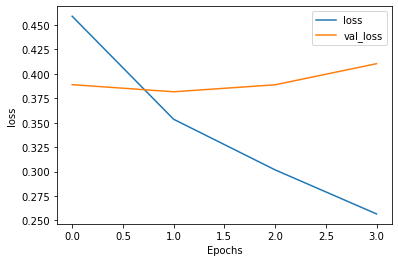

In [65]:
plotgraphs(history12, 'loss')

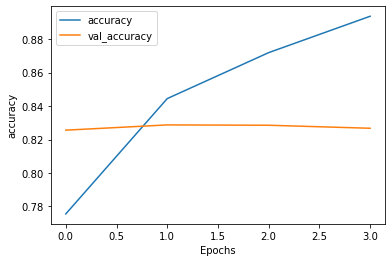

In [64]:
plotgraphs(history12,'accuracy')

In [43]:
DATA_OUT_PATH = './data_out/' ##################################경로
INPUT_TEST_DATA = 'nsmc_test_input.npy'
LABEL_TEST_DATA = 'nsmc_test_label.npy'
SAVE_FILE_NM = 'weights.h5' #저장된 best model 이름

test_input = np.load(open(DATA_IN_PATH + INPUT_TEST_DATA, 'rb'))
test_input = pad_sequences(test_input, maxlen=test_input.shape[1])
test_label_data = np.load(open(DATA_IN_PATH + LABEL_TEST_DATA, 'rb'))

In [44]:
model.load_weights(os.path.join(DATA_OUT_PATH, model_name, SAVE_FILE_NM))

In [45]:
model.evaluate(test_input, test_label_data)

1563/1563 [==============================] - 2s 1ms/step - loss: 0.3851 - accuracy: 0.8271


[0.385105699300766, 0.8270800113677979]

In [92]:
### 캐글을 위한 확인
predictions = model.predict(test_input, batch_size = BATCH_SIZE)
predictions = predictions.squeeze(-1)

test_id = np.load(open(DATA_IN_PATH + LABEL_TEST_DATA, 'rb'), allow_pickle = True)

if not os.path.exists(DATA_OUT_PATH):
    os.makedirs(DATA_OUT_PATH)

output = pd.DataFrame(data={"id":list(test_id), "sentiment": list(predictions)})
output.to_csv(DATA_OUT_PATH+"good_or_not_label2_cnn.csv", index=False, quoting=3)

98/98 [==============================] - 1s 9ms/step


In [90]:
train_input

array([[  463,    20,   265, ...,     0,     0,     0],
       [  604,     1,   219, ...,   969,   680,    24],
       [  393,  2456, 25028, ...,     2,   226,    13],
       ...,
       [   60,  1458,  5612, ..., 10480, 10415,  1050],
       [ 1046,     1,  2271, ...,  1231,   545,  7862],
       [    1,  1806,    22, ...,    63,  1290,     1]])